In [1]:
import numpy as np
from PIL import Image
from pathlib import Path
import random
import os

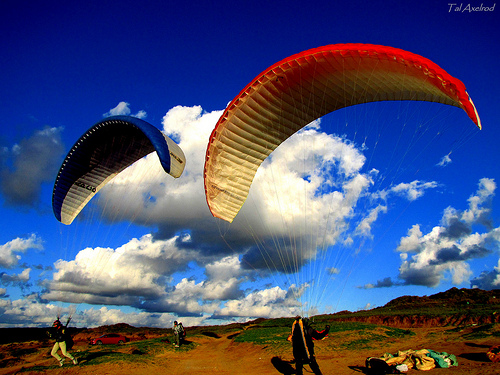

In [2]:
image_dir = "data/colorization/5/flickr30k-images/"
image_path = random.choice(os.listdir(image_dir))
img = Image.open(image_dir + image_path)
img


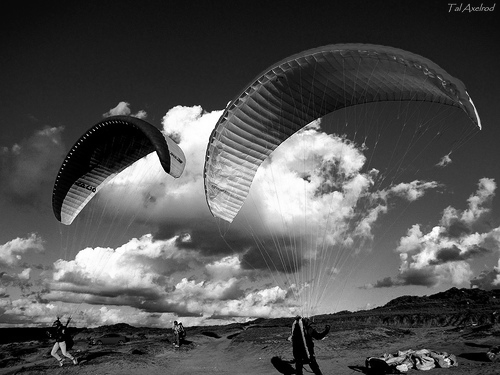

In [3]:
bw_img = img.convert("L").convert("RGB")
bw_img

In [4]:
def channel_variance(img_arr):
    r, g, b = img_arr[:,:,0], img_arr[:,:,1], img_arr[:,:,2]
    var_rg = (r - g).var() 
    var_gb = (g - b).var() 
    var_rb = (r - b).var()
    return np.array([var_rg, var_gb, var_rb]).mean()

In [5]:
img_arr = np.array(img)
bw_img_arr = np.array(bw_img)

channel_variance(img_arr), channel_variance(bw_img_arr)

(6687.699269390508, 0.0)

In [6]:
from skimage import color, io
import numpy as np
from PIL import Image
import cv2

# target = io.imread("data/colorization/flickr30k-images/81641.jpg")
img = cv2.imread("data/colorization/5/flickr30k-images/2278776373.jpg")
LAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

cv2.imwrite('L.png', LAB[:,:,0])
cv2.imwrite('a.png', LAB[:,:,1])
cv2.imwrite('b.png', LAB[:,:,2])

BGR = cv2.cvtColor(LAB, cv2.COLOR_LAB2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('new.png', BGR)

# target = color.rgb2lab(target / 255.0)
# Image.fromarray(target.astype(np.uint8))
# target
# source = target[0:256, 0:256, 0]

True

In [ ]:
channel_var = 100
image_dir = "data/colorization/coco/"
while channel_var > 12:
    image_path = random.choice(os.listdir(image_dir))
    img = Image.open(image_dir + image_path)
    img_arr = np.array(img)
    channel_var = channel_variance(img_arr)
print(channel_var)
img

In [ ]:
image_dir = "data/colorization/flickr30k-images/"
image_path = random.choice(os.listdir(image_dir))
img = Image.open(image_dir + image_path)
img

In [7]:
from transformers import InstructBlipProcessor, InstructBlipForConditionalGeneration
import torch
from PIL import Image
import requests

model = InstructBlipForConditionalGeneration.from_pretrained("Salesforce/instructblip-vicuna-7b", torch_dtype=torch.float16)
processor = InstructBlipProcessor.from_pretrained("Salesforce/instructblip-vicuna-7b", torch_dtype=torch.float16)

model.eval()

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

url = "https://raw.githubusercontent.com/salesforce/LAVIS/main/docs/_static/Confusing-Pictures.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB").resize((512, 512))
prompt = "You are a professional photographer. Give a technical description of the colors of the main objects in this image and the overall color tone of the scene"
# prompt = "You are an artist. Describe the main colors of this image and their temperature"
# prompt = "As an expert in digital restoration, provide a technical assessment of the colors of the principal objects and the global color tone of this image.",


def blip_generate(text, image):
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            do_sample=False,
            num_beams=5,
            max_length=256,
            min_length=1,
            top_p=0.9,
            repetition_penalty=1.5,
            length_penalty=1.0,
            temperature=1,
        )
        return processor.batch_decode(outputs, skip_special_tokens=True)[0].strip()

print(blip_generate(prompt, image))
image

ModuleNotFoundError: No module named 'transformers'

In [ ]:
print(blip_generate(prompt, img))
img